# Regressão Linear, p-value e métricas.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import *

### A) Correlação


##### **Caso I**:


In [3]:
def notation_format(valor):
    s = str(valor).lower()

    if 'e' not in s:
        s = "{:e}".format(float(valor))
        
    base, expoente = s.split('e')
    expoente_limpo = str(int(expoente))
    tabela = str.maketrans("0123456789-", "⁰¹²³⁴⁵⁶⁷⁸⁹⁻")
    expoente_unicode = expoente_limpo.translate(tabela)
    
    return f"{base} × 10{expoente_unicode}"

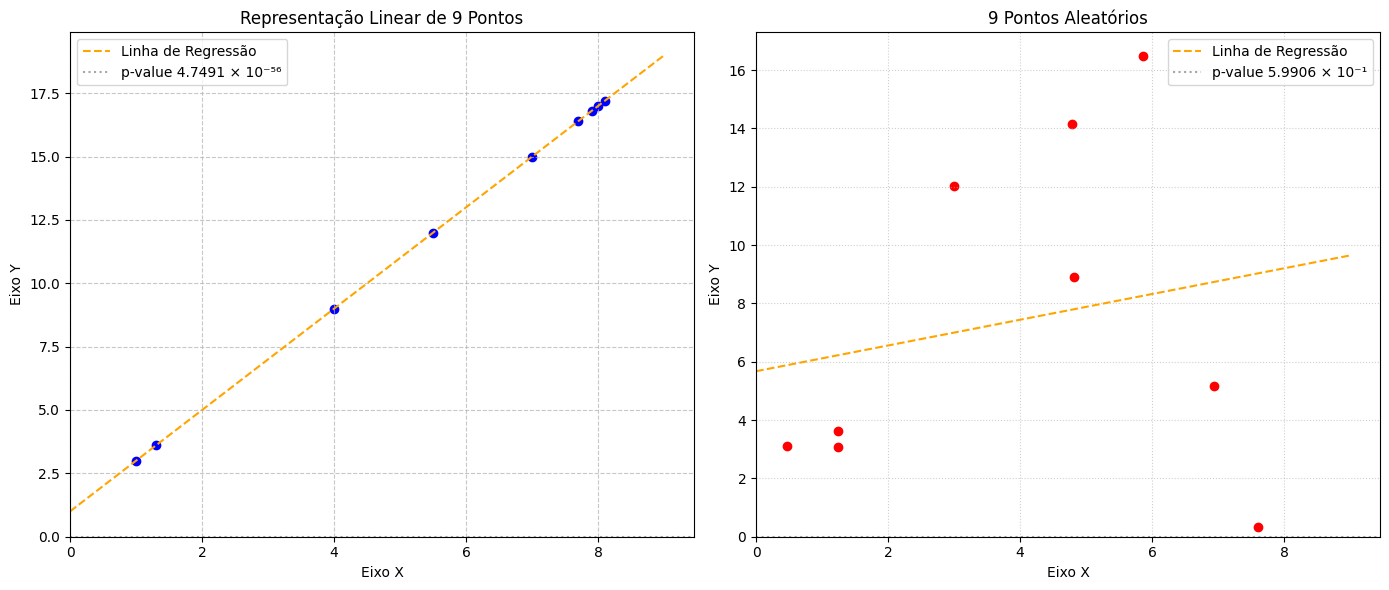

In [4]:

numero_de_pontos = 9


abscissas_linear = np.array([1,1.3,4,5.5,7,7.7,7.9,8,8.1])
array_nulo = np.array([0 for i in range(9)])
ordenadas_linear = 2 * abscissas_linear + 1

np.random.seed(42)
abscissas_aleatorias = np.random.uniform(0, 8, numero_de_pontos)
ordenadas_aleatorias = np.random.uniform(0, 17, numero_de_pontos)


figura, eixos = plt.subplots(1, 2, figsize=(14, 6))

lin_reg_linear = linregress(abscissas_linear, ordenadas_linear)
lin_reg_aleatoria = linregress(abscissas_aleatorias, ordenadas_aleatorias)


x_fit = np.array([0, 9])
y_fit_linear = lin_reg_linear.slope * x_fit + lin_reg_linear.intercept
eixos[0].plot(x_fit, y_fit_linear, color='orange', linestyle='--', label='Linha de Regressão')

eixos[0].scatter(
    abscissas_linear,
    ordenadas_linear, 
    #marker='o', 
    #linestyle='-', 
    color='b', 
    )

eixos[0].set_title('Representação Linear de 9 Pontos')
eixos[0].set_xlabel('Eixo X')
eixos[0].set_ylabel('Eixo Y')
eixos[0].set_xlim(left=0)
eixos[0].set_ylim(bottom=0)
eixos[0].grid(True, linestyle='--', alpha=0.7)
eixos[0].axhline(label=f"p-value {notation_format(f"{lin_reg_linear.pvalue:.4e}")}", color='gray', linestyle=':', alpha=0.7)
eixos[0].legend()


x_fit_aleatorio = np.array([0, 9])
y_fit_aleatorio = lin_reg_aleatoria.slope * x_fit_aleatorio + lin_reg_aleatoria.intercept
eixos[1].plot(x_fit_aleatorio, y_fit_aleatorio, color='orange', linestyle='--', label='Linha de Regressão')


eixos[1].scatter(abscissas_aleatorias, ordenadas_aleatorias, color='r')
eixos[1].set_title('9 Pontos Aleatórios')
eixos[1].set_xlabel('Eixo X')
eixos[1].set_ylabel('Eixo Y')
eixos[1].set_xlim(left=0)
eixos[1].set_ylim(bottom=0)
eixos[1].grid(True, linestyle=':', alpha=0.6)
eixos[1].axhline(label=f"p-value {notation_format(f"{lin_reg_aleatoria.pvalue:.4e}")}", color='gray', linestyle=':', alpha=0.7)
eixos[1].legend()



plt.tight_layout()

In [5]:
slope_linear = lin_reg_linear.slope
var_intercept_linear = lin_reg_linear.intercept
var_slope_linear = lin_reg_linear.stderr ** 2

slope_aleatorio = lin_reg_aleatoria.slope
var_intercept_aleatorio = lin_reg_aleatoria.intercept
var_slope_aleatorio = lin_reg_aleatoria.stderr ** 2

x_linear_mean = np.mean(abscissas_linear)
x_aleatorio_mean = np.mean(abscissas_aleatorias)

cov_slope_intercept_linear = -x_linear_mean * var_slope_linear
cov_slope_intercept_aleatorio = -x_aleatorio_mean*var_slope_aleatorio

cov_matrix_linear = np.array([
    [var_intercept_linear, cov_slope_intercept_linear],
    [cov_slope_intercept_linear, var_slope_linear]
])

cov_matrix_aleatorio = np.array([
    [var_intercept_aleatorio, cov_slope_intercept_aleatorio],
    [cov_slope_intercept_aleatorio, var_slope_aleatorio]
])

print(cov_matrix_aleatorio)
print(cov_matrix_linear)


[[ 5.67488146 -2.56671355]
 [-2.56671355  0.64263595]]
[[ 1.00000000e+00 -7.11952543e-16]
 [-7.11952543e-16  1.26882631e-16]]


### B) Estimando um Intervalo de Confiança para a Média